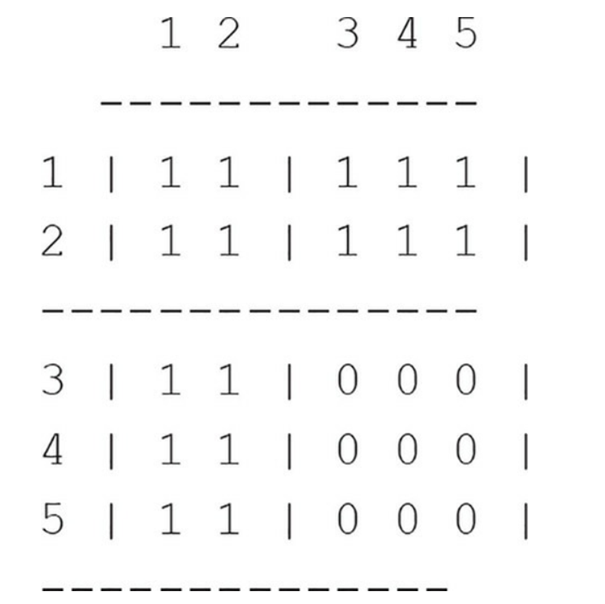

In [12]:
import numpy as np

# Exemple simplifié de la matrice d'adjacence des données de Sampson
sampson_data = np.array([
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 0, 0, 0],
    [1, 1, 0, 0, 0]
])


In [21]:
from sklearn.cluster import AgglomerativeClustering

# Appliquer un clustering hiérarchique
clustering = AgglomerativeClustering(n_clusters=4, linkage='ward')
clusters = clustering.fit_predict(sampson_data)

# Affichage des clusters
print(f"Clusters des novices : {clusters}")


Clusters des novices : [3 1 2 0]


In [22]:
def create_blockmodel(adj_matrix, clusters):
    n_blocks = len(set(clusters))
    blockmodel = np.zeros((n_blocks, n_blocks))

    for i in range(n_blocks):
        for j in range(n_blocks):
            block_i = np.where(clusters == i)[0]
            block_j = np.where(clusters == j)[0]
            sub_matrix = adj_matrix[np.ix_(block_i, block_j)]
            blockmodel[i, j] = np.mean(sub_matrix)

    return blockmodel

blockmodel = create_blockmodel(sampson_data, clusters)
print("Matrice de bloc :")
print(blockmodel)


Matrice de bloc :
[[0. 1. 0. 1.]
 [1. 1. 1. 1.]
 [0. 1. 0. 1.]
 [1. 1. 1. 1.]]


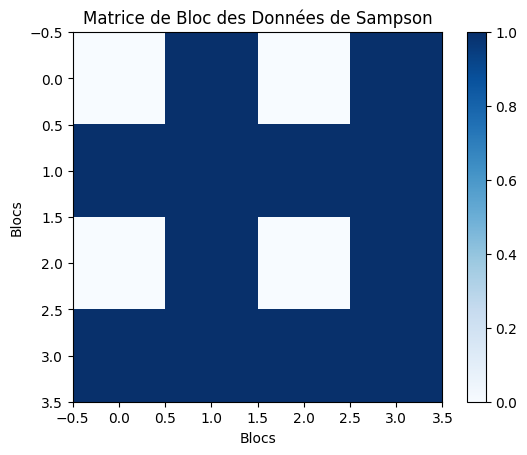

In [23]:
import matplotlib.pyplot as plt

plt.imshow(blockmodel, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title("Matrice de Bloc des Données de Sampson")
plt.xlabel("Blocs")
plt.ylabel("Blocs")
plt.show()
